In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
homes = pd.read_excel("Homes for Sale and Real Estate.xlsx")

In [3]:
df = homes.copy()

In [4]:
df

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles
...,...,...,...,...,...,...,...,...
3355,203 17 Ave NE,799000,CA AB T2E 1L9,Tuxedo Park,3,2.0,869,RE/MAX Real Estate (Central)
3356,4111 162 Ave SW,8000000,CA AB T2Y 0N7,NaN,5,4.5,9031,Diamond Realty & Associates Ltd.
3357,289 Sage Hill Circle NW,595000,CA AB T3R 1V2,Sage Hill,3,2.5,1733,RE/MAX House Of Real Estate
3358,738 1 Ave SW #1307,7988000,CA AB T2P 5G8,Eau Claire,2,2.5,3544,RE/MAX Real Estate (Central)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      3360 non-null   object 
 1   Price        3360 non-null   int64  
 2   Description  3360 non-null   object 
 3   Place        3344 non-null   object 
 4   Beds         3360 non-null   int64  
 5   Bath         3360 non-null   float64
 6   Sq.Ft        3360 non-null   int64  
 7   Website      3359 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 210.1+ KB


In [6]:
# Check for duplicate values
df.duplicated().sum()

0

In [7]:
df.head(1)

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty


In [8]:
df['Place'].isnull().sum()

16

In [9]:
df['Website'].isnull().sum()

1

In [10]:
df.drop(columns='Place', inplace=True)

In [11]:
df.head(1)

,Address,Price,Description,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,4,3.5,1813,Century 21 Bravo Realty


In [12]:
df.columns

Index(['Address', 'Price', 'Description', 'Beds', 'Bath', 'Sq.Ft', 'Website'], dtype='object')

In [13]:
# Renaming Columns
new_name = {'Price':'Price ($)', 'Beds':'Bedroom (No.)', 'Bath':'Bath Type', 'Sq.Ft':'Size (sq.ft)', 'Website':'Real Estate Coy'}
df = df.rename(columns=new_name)

In [14]:
df.head(1)

,Address,Price ($),Description,Bedroom (No.),Bath Type,Size (sq.ft),Real Estate Coy
0,3704 42 St SW,979999,CA AB T3E 3N1,4,3.5,1813,Century 21 Bravo Realty


In [15]:
df['Price ($)'].max()

10000000

In [16]:
df[df['Price ($)']==10000000]

,Address,Price ($),Description,Bedroom (No.),Bath Type,Size (sq.ft),Real Estate Coy
2799,100 10A St NW #802,10000000,CA AB T2N4T3,3,3.5,4715,Purpose Realty


In [17]:
df['Price ($)'].min()

141900

In [18]:
df[df['Price ($)']==141900]

,Address,Price ($),Description,Bedroom (No.),Bath Type,Size (sq.ft),Real Estate Coy
2341,5200 44 Ave NE #1353,141900,CA AB T1Y 7L4,1,1.0,309,RE/MAX Landan Real Estate


In [19]:
df['Bedroom (No.)'].max()

10

In [20]:
df[df['Bedroom (No.)']==10]

,Address,Price ($),Description,Bedroom (No.),Bath Type,Size (sq.ft),Real Estate Coy
1830,7717&7719 41 Ave NW,880000,CA AB T3R 1S6,10,4.0,2054,Homecare Realty Ltd.


In [21]:
df['Bedroom (No.)'].min()

1

In [22]:
df[df['Bedroom (No.)']==1]

,Address,Price ($),Description,Bedroom (No.),Bath Type,Size (sq.ft),Real Estate Coy
22,1805 26 Ave SW #302,269000,CA AB T2T 1E2,1,1.0,707,Exp Realty
24,215 25 Ave SW #403,212000,CA AB T2S 0L2,1,1.0,563,Real Estate Professionals Inc.
58,222 Riverfront Ave SW #414,469000,CA AB T2P 0X2,1,1.0,700,Grand Realty
72,310 12 Ave SW #2604,279900,CA AB T2R 1B5,1,1.0,445,RE/MAX Realty Professionals
94,225 11 Ave SE #1909,330000,CA AB T2G 0G3,1,1.0,549,Coldwell Banker Mountain Central
...,...,...,...,...,...,...,...
3310,221 6 Ave SE #1905,201999,CA AB T2G 4Z9,1,1.0,767,E-Trinity Realty And Management Ltd
3313,47 34 Ave SW,749900,CA AB T2S 2Y9,1,1.0,689,Purpose Realty
3319,2727 28 Ave SE #109,234900,CA AB T2B 0L4,1,1.0,571,Stratten Gates Real Estate Ltd.
3328,226 Village Terrace SW #5,234000,CA AB T3H2L4,1,1.0,542,Cir Realty


In [23]:
df[df['Bedroom (No.)']==1].count()

Address            364
Price ($)          364
Description        364
Bedroom (No.)      364
Bath Type          364
Size (sq.ft)       364
Real Estate Coy    364
dtype: int64

In [24]:
df['Bath Type'].max()

8.0

In [25]:
df[df['Bath Type']==8.0]

,Address,Price ($),Description,Bedroom (No.),Bath Type,Size (sq.ft),Real Estate Coy
3194,1425 18 Ave NW,1799000,CA AB T2M 0W7,8,8.0,2962,Stratten Gates Real Estate Ltd.


In [26]:
df['Bath Type'].min()

1.0

In [27]:
df[df['Bath Type']==1.0]

,Address,Price ($),Description,Bedroom (No.),Bath Type,Size (sq.ft),Real Estate Coy
8,928 3 Ave NW #1,269900,CA AB T2N 0J6,2,1.0,756,Century 21 Bamber Realty Ltd.
22,1805 26 Ave SW #302,269000,CA AB T2T 1E2,1,1.0,707,Exp Realty
24,215 25 Ave SW #403,212000,CA AB T2S 0L2,1,1.0,563,Real Estate Professionals Inc.
34,2710 Dovely Park SE,270000,CA AB T2B 3G8,2,1.0,758,Real Broker
38,1712 38 St SE #102,169900,CA AB T2A 1H1,2,1.0,751,RE/MAX Realty Professionals
...,...,...,...,...,...,...,...
3319,2727 28 Ave SE #109,234900,CA AB T2B 0L4,1,1.0,571,Stratten Gates Real Estate Ltd.
3328,226 Village Terrace SW #5,234000,CA AB T3H2L4,1,1.0,542,Cir Realty
3346,1111 15 Ave SW #801,170000,CA AB T2R 0S8,2,1.0,724,Power Properties
3351,56 6 St NE,524900,CA AB T2E 3X9,2,1.0,1007,Tink


In [28]:
df[df['Bath Type']==1.0].count()

Address            545
Price ($)          545
Description        545
Bedroom (No.)      545
Bath Type          545
Size (sq.ft)       545
Real Estate Coy    545
dtype: int64

In [29]:
df['Bedroom (No.)'].unique()

array([ 4,  2,  6,  3,  5,  1,  7,  8, 10], dtype=int64)

In [30]:
df['Bath Type'].unique()

array([3.5, 2. , 2.5, 1. , 3. , 1.5, 4.5, 5. , 6.5, 4. , 5.5, 6. , 7.5,
       8. ])

In [31]:
df['Size (sq.ft)'].max()

39654

In [32]:
df['Size (sq.ft)'].min()

307

In [33]:
df[df['Size (sq.ft)']==39654]

,Address,Price ($),Description,Bedroom (No.),Bath Type,Size (sq.ft),Real Estate Coy
1584,2012 3 Ave NW,1695000,CA AB T2N 0K2,4,3.5,39654,Cir Realty


In [34]:
df[df['Size (sq.ft)']==307]

,Address,Price ($),Description,Bedroom (No.),Bath Type,Size (sq.ft),Real Estate Coy
1534,1234 5 Ave NW #2503,209900,CA AB T2N 0R9,1,1.0,307,Royal Lepage Benchmark


<Figure size 500x4500 with 0 Axes>

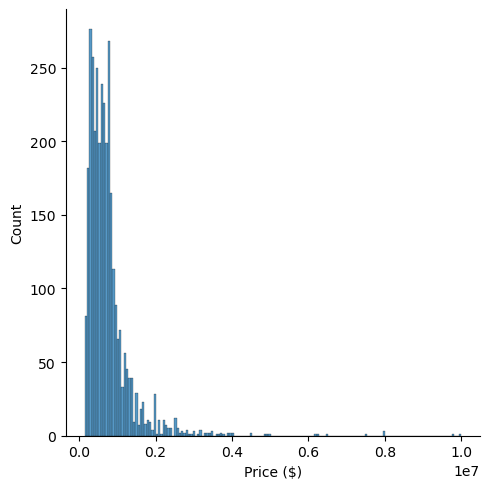

In [35]:
# Visualize the distribution of Price ($) using displot
plt.figure(figsize=(5,45))
sns.displot(data=df['Price ($)'])

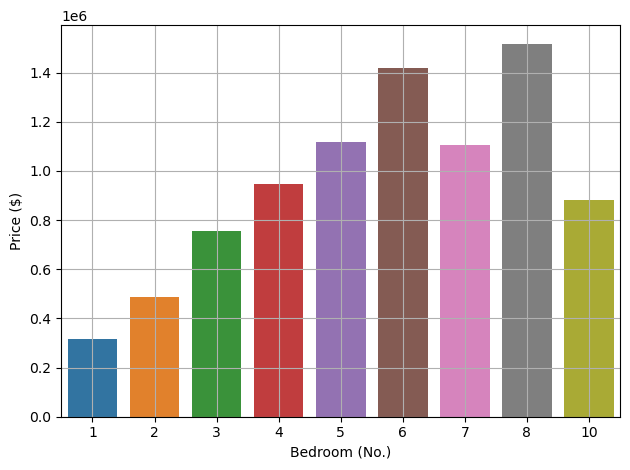

In [36]:
ax = sns.barplot(data=df, x = 'Bedroom (No.)', y = 'Price ($)', errorbar=None)
# ax.set_xticks([0,10])
# ax.set_yticks([0,50])
ax.grid()
plt.tight_layout()

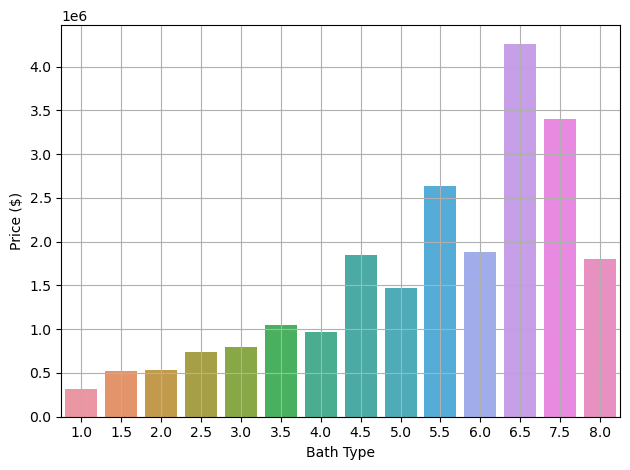

In [37]:
ax = sns.barplot(data=df, x = 'Bath Type', y = 'Price ($)', errorbar=None)
# ax.set_xticks([0,10])
# ax.set_yticks([0,50])
ax.grid()
plt.tight_layout()

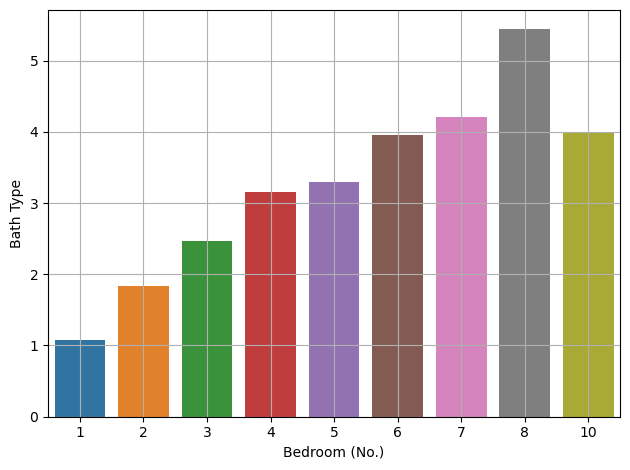

In [38]:
ax = sns.barplot(data=df, x = 'Bedroom (No.)', y = 'Bath Type', errorbar=None)
# ax.set_xticks([0,10])
# ax.set_yticks([0,50])
ax.grid()
plt.tight_layout()

In [39]:
df.sort_values(by='Price ($)')

,Address,Price ($),Description,Bedroom (No.),Bath Type,Size (sq.ft),Real Estate Coy
2341,5200 44 Ave NE #1353,141900,CA AB T1Y 7L4,1,1.0,309,RE/MAX Landan Real Estate
649,4512 75 St NW #102,143900,CA AB T3B2M9,1,1.0,504,Real Estate Professionals Inc.
2306,116 3 Ave SE #907,145900,CA AB T2G 5A9,2,1.0,666,Real Broker
3122,1820 9 St SW #303,149000,CA AB T2T3C3,1,1.0,475,First Place Realty
3124,1820 9 #306,149000,CA AB T2T3C3,1,1.0,471,First Place Realty
...,...,...,...,...,...,...,...
3358,738 1 Ave SW #1307,7988000,CA AB T2P 5G8,2,2.5,3544,RE/MAX Real Estate (Central)
3067,40 Eagle Ridge Place SW,7995000,CA AB T2V 2V8,5,5.5,5434,Century 21 Bamber Realty Ltd.
3356,4111 162 Ave SW,8000000,CA AB T2Y 0N7,5,4.5,9031,Diamond Realty & Associates Ltd.
3149,300 37 Ave SW,9800000,CA AB T3E 2P8,3,3.5,7049,Real Estate Professionals Inc.


In [40]:
df.sort_values(by='Bedroom (No.)')

,Address,Price ($),Description,Bedroom (No.),Bath Type,Size (sq.ft),Real Estate Coy
1679,550 Riverfront Ave SE #1604,300000,CA AB T2G 1E5,1,1.0,499,RE/MAX Real Estate (Central)
1529,181 Skyview Ranch Manor NE #3404,234900,CA AB T3N 0V2,1,1.0,589,RE/MAX House Of Real Estate
3145,1820 9 St SW #203,149000,CA AB t2t3c3,1,1.0,475,First Place Realty
2667,208 Holy Cross #105,374900,CA AB T2S 3G3,1,1.0,766,RE/MAX Real Estate (Central)
1534,1234 5 Ave NW #2503,209900,CA AB T2N 0R9,1,1.0,307,Royal Lepage Benchmark
...,...,...,...,...,...,...,...
2646,4626 - 4628 4 St NW,998690,CA AB T2K 1A2,8,4.0,1645,Argent Realty & Management Ltd.
3194,1425 18 Ave NW,1799000,CA AB T2M 0W7,8,8.0,2962,Stratten Gates Real Estate Ltd.
2162,2339 Munro Dr NE,949800,CA AB T2E 5Z1,8,4.0,2201,Real Broker
2683,19 Elveden Place SW,3700000,CA AB T3H 0L1,8,7.5,8179,Real Broker


In [41]:
df.sort_values(by='Bath Type')

,Address,Price ($),Description,Bedroom (No.),Bath Type,Size (sq.ft),Real Estate Coy
1679,550 Riverfront Ave SE #1604,300000,CA AB T2G 1E5,1,1.0,499,RE/MAX Real Estate (Central)
654,11811 Lake Fraser Dr SE #1608,249900,CA AB T2J 7J4,2,1.0,755,Listed by Jamie Newton
2032,823 1 Ave NW #103,225000,CA AB T2N 0A4,1,1.0,531,2% Realty
659,200 Seton Circle SE #5302,289900,CA AB T3M 3V3,1,1.0,543,Real Estate Professionals Inc.
2020,310 12 Ave SW #2903,363000,CA AB T2R 1B5,1,1.0,524,Real Estate Professionals Inc.
...,...,...,...,...,...,...,...
3299,1420 20 St NW,2599999,CA AB T2N 2K6,6,7.5,4454,Urban-Realty.Ca
2683,19 Elveden Place SW,3700000,CA AB T3H 0L1,8,7.5,8179,Real Broker
3225,1611 21 A St NW,2299000,CA AB T2N 2M3,6,7.5,4167,RE/MAX House Of Real Estate
3113,4308 Coronation Dr SW,4998000,CA AB T2S 1M2,5,7.5,6143,Tink


In [42]:
df.describe()

,Price ($),Bedroom (No.),Bath Type,Size (sq.ft)
count,3.360000e+03,3360.000000,3360.000000,3360.000000
mean,7.500648e+05,3.125000,2.479167,1558.815179
std,6.447619e+05,1.349087,1.023546,1056.424307
min,1.419000e+05,1.000000,1.000000,307.000000
25%,3.990000e+05,2.000000,2.000000,933.000000
50%,6.199000e+05,3.000000,2.500000,1352.000000
75%,8.499220e+05,4.000000,3.500000,2023.250000
max,1.000000e+07,10.000000,8.000000,39654.000000


<Axes: xlabel='Bath Type', ylabel='Bedroom (No.)'>

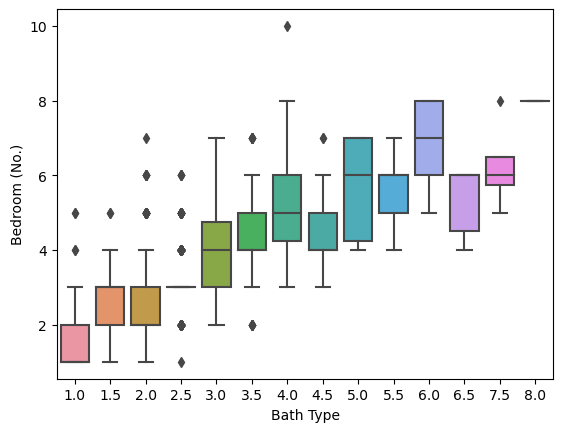

In [43]:
sns.boxplot(data=df, x='Bath Type', y='Bedroom (No.)')

<Axes: xlabel='Bedroom (No.)'>

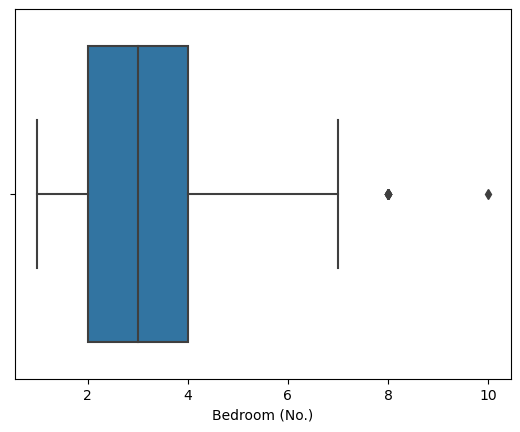

In [44]:
sns.boxplot(data=df, x='Bedroom (No.)')

<Axes: xlabel='Bath Type'>

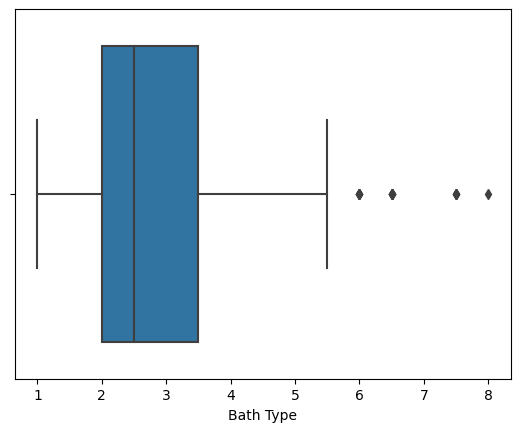

In [45]:
sns.boxplot(data=df, x='Bath Type')

<Axes: xlabel='Price ($)'>

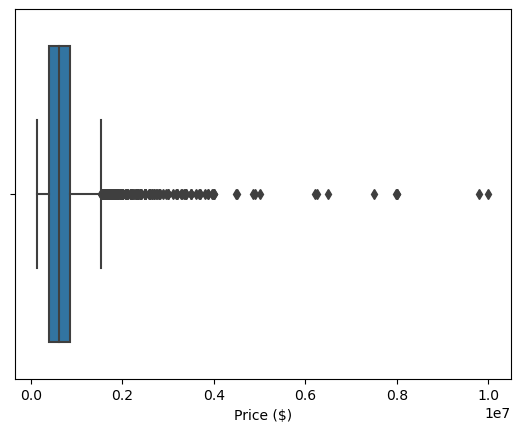

In [46]:
sns.boxplot(data=df, x='Price ($)')

In [47]:
df.head(1)

,Address,Price ($),Description,Bedroom (No.),Bath Type,Size (sq.ft),Real Estate Coy
0,3704 42 St SW,979999,CA AB T3E 3N1,4,3.5,1813,Century 21 Bravo Realty


In [48]:
df['Real Estate Coy'].mode()

0    Cir Realty
Name: Real Estate Coy, dtype: object

In [49]:
df[df['Real Estate Coy'] == 'Cir Realty'].count()

Address            288
Price ($)          288
Description        288
Bedroom (No.)      288
Bath Type          288
Size (sq.ft)       288
Real Estate Coy    288
dtype: int64

In [50]:
df['Real Estate Coy'].value_counts().head()

Cir Realty                      288
Exp Realty                      247
RE/MAX Real Estate (Central)    227
Real Broker                     206
RE/MAX House Of Real Estate     163
Name: Real Estate Coy, dtype: int64

In [51]:
df['Bedroom (No.)'].value_counts()

2     853
4     840
3     819
1     364
5     335
6     116
7      24
8       8
10      1
Name: Bedroom (No.), dtype: int64

In [52]:
df['Bath Type'].value_counts()

2.5    745
2.0    741
3.5    719
1.0    545
3.0    198
1.5    185
4.5    117
4.0     62
5.5     22
5.0     10
6.5      6
6.0      5
7.5      4
8.0      1
Name: Bath Type, dtype: int64

In [53]:
df_prbr1 = (df['Bedroom (No.)'].value_counts())/(df['Bedroom (No.)'].count())
df_prbr1

2     0.253869
4     0.250000
3     0.243750
1     0.108333
5     0.099702
6     0.034524
7     0.007143
8     0.002381
10    0.000298
Name: Bedroom (No.), dtype: float64

In [54]:
df_prbr2 = df_prbr1 * 100
df_prbr2

2     25.386905
4     25.000000
3     24.375000
1     10.833333
5      9.970238
6      3.452381
7      0.714286
8      0.238095
10     0.029762
Name: Bedroom (No.), dtype: float64

In [55]:
df_prbt1 = (df['Bath Type'].value_counts())/(df['Bath Type'].count())
df_prbt1

2.5    0.221726
2.0    0.220536
3.5    0.213988
1.0    0.162202
3.0    0.058929
1.5    0.055060
4.5    0.034821
4.0    0.018452
5.5    0.006548
5.0    0.002976
6.5    0.001786
6.0    0.001488
7.5    0.001190
8.0    0.000298
Name: Bath Type, dtype: float64

In [56]:
df_prbt2 = df_prbt1 * 100
df_prbt2

2.5    22.172619
2.0    22.053571
3.5    21.398810
1.0    16.220238
3.0     5.892857
1.5     5.505952
4.5     3.482143
4.0     1.845238
5.5     0.654762
5.0     0.297619
6.5     0.178571
6.0     0.148810
7.5     0.119048
8.0     0.029762
Name: Bath Type, dtype: float64

In [57]:
df_prbr2.sum()

100.0

In [58]:
df_prbt2.sum()

100.0